## Import the required libraries

In [1]:
# import opendatasets as od
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.optimizers import Adam

## Utility Functions

In [2]:
@tf.function
def tensor_operator(tensor):
    print("Datatype:", tensor.dtype)
    print("Number of dimention:", tensor.ndim)
    print("Shape:", tensor.shape)

## Loading the dataset

In [3]:
data_dir = "english-typed-font-in-csv"

In [4]:
data = pd.read_csv(data_dir+"/typedCSV.csv")

In [5]:
no_rows , no_cols = data.shape
print("number of rows",no_rows)
print("number of columns",no_cols)

number of rows 62992
number of columns 785


## Data processing
Now we are going to convert the data into
* Numpy array
* dataset slicing to extract the target label
* extracting the traning data from the dataset

In [6]:
dataset = np.array(data)

In [7]:
y_train = dataset[ :,0]

In [8]:
x_train = dataset[:,1:]

## Visualing what we have got in the traning data
With the help of `matplotlib` library we will see what the images are along with the lable.

In [9]:
# The function will return the actual lable of the image index.

def actualLable(idx):
    if idx < 10 :
        return str(idx)
    elif idx < 36 :
        return chr(idx + 55)
    else :
        return chr(idx + 61)

In [10]:
for idx in range(62):
    print(f"{idx}: {actualLable(idx)}")

0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: A
11: B
12: C
13: D
14: E
15: F
16: G
17: H
18: I
19: J
20: K
21: L
22: M
23: N
24: O
25: P
26: Q
27: R
28: S
29: T
30: U
31: V
32: W
33: X
34: Y
35: Z
36: a
37: b
38: c
39: d
40: e
41: f
42: g
43: h
44: i
45: j
46: k
47: l
48: m
49: n
50: o
51: p
52: q
53: r
54: s
55: t
56: u
57: v
58: w
59: x
60: y
61: z


44003


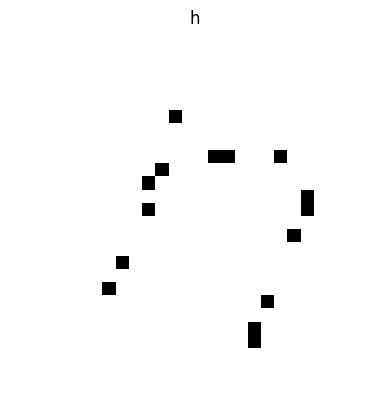

In [11]:
m = x_train.shape[0]
random_character_index = np.random.randint(m)
print(random_character_index)
pixel_array = x_train[random_character_index].reshape(28 , 28)
plt.imshow(pixel_array , cmap = "gray" , vmin = 0 , vmax = 1)
lable = actualLable(y_train[random_character_index])
plt.title(lable)
plt.axis("off")
plt.show()

## Normalizing the dataset

In [12]:
x_train = x_train / 255

In [13]:
tensor_operator(x_train)
tensor_operator(y_train)

Datatype: <dtype: 'float64'>
Number of dimention: 2
Shape: (62992, 784)
Datatype: <dtype: 'int64'>
Number of dimention: 1
Shape: (62992,)


In [14]:
y_train = np.expand_dims(y_train, axis=1)
tensor_operator(y_train)
pd.DataFrame(y_train)

Datatype: <dtype: 'int64'>
Number of dimention: 2
Shape: (62992, 1)


,0
0,0
1,0
2,0
3,0
4,0
...,...
62987,61
62988,61
62989,61
62990,61


In [16]:
normalized_dataset = np.append(y_train , x_train , axis = 1)

In [17]:
pd.DataFrame(normalized_dataset)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,...,0.980392,1.000000,1.000000,0.984314,1.000000,1.000000,1.0,1.0,1.0,1.0
1,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,1.000000,1.000000,1.000000,0.976471,0.992157,1.0,1.0,1.0,1.0
2,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
3,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
4,0.0,1.000000,0.992157,1.000000,0.992157,0.984314,1.000000,0.996078,1.000000,1.000000,...,1.000000,1.000000,0.992157,0.992157,1.000000,1.000000,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62987,61.0,1.000000,0.988235,0.996078,1.000000,0.992157,1.000000,1.000000,0.992157,1.000000,...,0.964706,1.000000,0.988235,1.000000,0.988235,1.000000,1.0,1.0,1.0,1.0
62988,61.0,1.000000,0.996078,0.996078,0.996078,0.992157,1.000000,0.988235,0.996078,1.000000,...,0.988235,1.000000,0.996078,0.980392,1.000000,1.000000,1.0,1.0,1.0,1.0
62989,61.0,1.000000,0.988235,1.000000,1.000000,0.996078,1.000000,0.996078,1.000000,0.996078,...,0.988235,1.000000,0.996078,0.980392,1.000000,1.000000,1.0,1.0,1.0,1.0
62990,61.0,0.988235,0.996078,1.000000,1.000000,1.000000,0.996078,1.000000,0.972549,1.000000,...,0.960784,1.000000,0.984314,1.000000,0.992157,1.000000,1.0,1.0,1.0,1.0


## Spliting the dataset

In [18]:
tf.random.set_seed(40)
shuffled_dataset = tf.random.shuffle(normalized_dataset)

In [19]:
train_ratio = 0.9
cv_ratio = 0.05

In [20]:
total_samples = len(shuffled_dataset)
train_samples = int(total_samples * train_ratio)
cv_samples = int(total_samples * cv_ratio)
test_samples = int(total_samples - train_samples - cv_samples)

In [21]:
train_set = shuffled_dataset[:train_samples]
cv_set = shuffled_dataset[train_samples:train_samples + cv_samples]
test_set = shuffled_dataset[train_samples + cv_samples : ]

In [22]:
print("Training set size:", len(train_set))
print("Cross-validation set size:", len(cv_set))
print("Test set size:", len(test_set))

Training set size: 56692
Cross-validation set size: 3149
Test set size: 3151


In [23]:
X_train = train_set[ :,1:]
y_train = train_set[ :,0]

X_cv = cv_set[ :, 1 :]
y_cv = cv_set[ :,0]

X_test = test_set[ :, 1 :]
y_test = test_set[ :,0]

In [24]:
y_test

<tf.Tensor: shape=(3151,), dtype=float64, numpy=array([14., 36., 59., ..., 23., 17., 54.])>

## Neural Network Model

In [25]:
output_class = 62

In [26]:
tf.random.set_seed(42)
model = Sequential([
    tf.keras.Input(shape = (784 , )),
    Dense(units = 992 , activation = "relu" , name = "layer_1" , kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = 496 , activation = "relu" , name = "layer_2" , kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = 248 , activation = "relu" , name = "layer_3" , kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = 124 , activation = "relu" , name = "layer_4" , kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    Dense(units = output_class , activation = "linear" , name = "layer_5")
] , name = "Character_Recognizer")

## Visualizing the model

In [27]:
model.summary()

Model: "Character_Recognizer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                      │ (None, 992)                 │         778,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 496)                 │         492,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3 (Dense)                      │ (None, 248)                 │         123,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_4 (Dense)                      │ (None, 124)                 │          30,876 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_5 (Dense)                      │ (None, 62)                  │           7,750 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,433,130 (5.47 MB)

 Trainable params: 1,433,130 (5.47 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model

In [28]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = Adam(learning_rate = 0.0001)
)

## Traning our model on the dataset

In [29]:
model.fit(X_train , y_train , epochs = 30)

Epoch 1/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 63s 35ms/step - loss: 13.3091
Epoch 2/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 63s 35ms/step - loss: 4.1692
Epoch 3/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 2.9659
Epoch 4/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 63s 35ms/step - loss: 2.4774
Epoch 5/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - loss: 2.2218
Epoch 6/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 2.0668
Epoch 7/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 1.9624
Epoch 8/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 69s 39ms/step - loss: 1.8868
Epoch 9/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - loss: 1.8291
Epoch 10/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 1.7840
Epoch 11/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 1.7476
Epoch 12/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 1.7172
Epoch 13/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 1.6911
Epoch 14/30
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - loss: 1.6687


## Model Prediction

In [30]:
def predictionFunction(input):
    logits = model.predict(input)
    prediction = tf.nn.softmax(logits).numpy()
    print(f"Sum of the probabilities :{tf.math.reduce_sum(prediction[0])}")
    return prediction

In [31]:
def predictionArrayFunction(prediction):
    predicted_categories = []

    for i in range(len(prediction)):
      predicted_category = np.argmax(prediction[i])
      predicted_categories.append(predicted_category)

    predicted_categories_array = np.array(predicted_categories)

    return predicted_categories_array

In [32]:
def plotComparisonFuncton(original_category_array , predicted_categories_array):
    plt.scatter(original_category_array, predicted_categories_array)
    plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Diagonal line for reference
    plt.xlabel("Original Category")
    plt.ylabel("Predicted Category")
    plt.title("Comparison of Predicted vs. Original Categories")
    plt.grid(True)
    plt.show()

In [33]:
def comparisonFunction(original_categories_array , predicted_categories_array):
    # Compare elements and count matches and mismatches
    num_matches = np.sum(predicted_categories_array == original_categories_array)
    num_mismatches = len(predicted_categories_array) - num_matches
    
    # Calculate accuracy (optional)
    accuracy = num_matches / len(predicted_categories_array) * 100
    
    print(f"Number of matches: {num_matches}")
    print(f"Number of mismatches: {num_mismatches}")
    print(f"Accuracy (if applicable): {accuracy:.2f}%")

In [34]:
train_prediction = predictionFunction(X_train)

1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Sum of the probabilities :0.9999999403953552


In [35]:
cv_prediction = predictionFunction(X_cv)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sum of the probabilities :1.0


In [36]:
test_prediction = predictionFunction(X_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sum of the probabilities :0.9999999403953552


In [37]:
train_predicted_categories_array = predictionArrayFunction(train_prediction)

In [38]:
cv_predicted_categories_array = predictionArrayFunction(cv_prediction)

In [39]:
test_predicted_categories_array = predictionArrayFunction(test_prediction)

In [40]:
original_category_train_array = np.array(y_train)
original_category_cv_array = np.array(y_cv)
original_category_test_array = np.array(y_test)

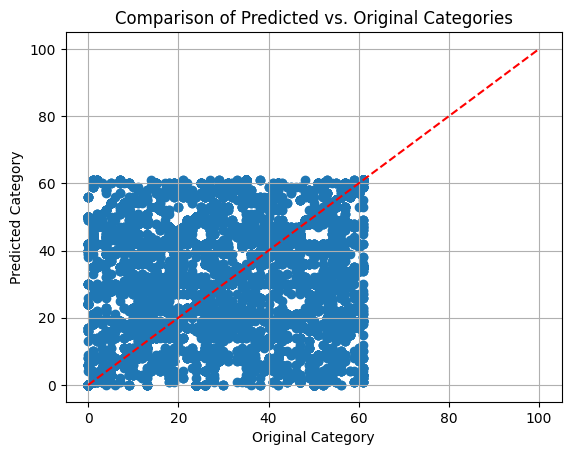

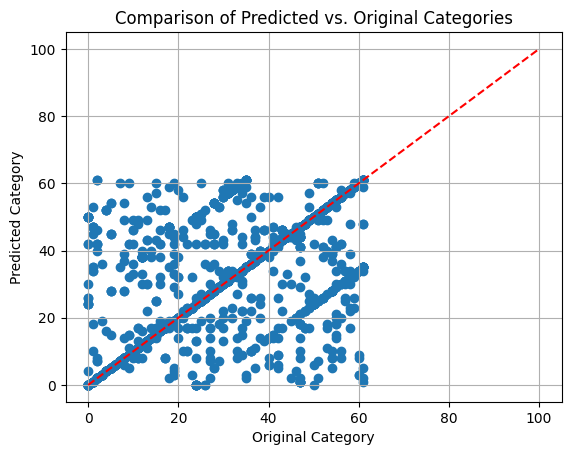

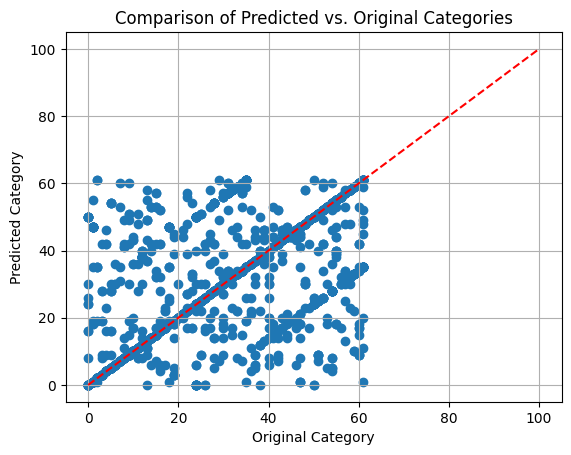

In [41]:
plotComparisonFuncton(original_category_train_array , train_predicted_categories_array)
plotComparisonFuncton(original_category_cv_array , cv_predicted_categories_array)
plotComparisonFuncton(original_category_test_array , test_predicted_categories_array)

In [42]:
comparisonFunction(original_category_train_array , train_predicted_categories_array)
comparisonFunction(original_category_cv_array , cv_predicted_categories_array)
comparisonFunction(original_category_test_array , test_predicted_categories_array)

Number of matches: 44014
Number of mismatches: 12678
Accuracy (if applicable): 77.64%
Number of matches: 2446
Number of mismatches: 703
Accuracy (if applicable): 77.68%
Number of matches: 2447
Number of mismatches: 704
Accuracy (if applicable): 77.66%


## Saving the model

In [44]:
model.save("first_model.keras")